# India-USA Inflation Analysis      

## INFLATION

##### Inflation is the rate at which the general level of prices for goods and services rises over time, resulting in a decrease in the purchasing power of money. It reflects how much more expensive a standardized basket of goods and services has become within a certain period.

### Inflation Impact Analysis: Overview
##### Inflation plays a crucial role in shaping economic conditions. While moderate inflation often signals a healthy, growing economy by encouraging consumption and investment, high or volatile inflation can erode the value of money, affect consumer confidence, and create financial uncertainty.

##### To understand the impact of inflation, it's essential to compare it with other macroeconomic indicators—one of the most important being currency exchange rates. Exchange rates are often influenced by inflation differentials between countries. For instance, higher inflation in one country compared to another typically leads to depreciation of its currency.

### Objective
##### This project analyzes the relationship between inflation in India and the United States and the INR/USD exchange rate over time. The goal is to examine whether trends in inflation are correlated with fluctuations in the exchange rate, and to what extent they influence each other.

### Dataset
##### For this analysis, I’ve used a dataset that includes:

##### Annual inflation rates for India and the US

##### INR/USD exchange rates over the same time period

### Inflation Impact Analysis

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

inflation_data = pd.read_csv('Inflation_Rates_Transformed.csv')
exchange_rate_data = pd.read_csv('USD_INR_Exchange_Rates.csv')

exchange_rate_data.head()

,Year,Exchange Rate (INR/USD)
0,2003,46.5908
1,2004,45.2610
2,2005,44.0002
3,2006,45.1861
4,2007,41.1774


In [2]:
inflation_data.head()

,Year,Inflation Rate (United States),Inflation Rate (India)
0,1980,13.549202,11.346073
1,1981,10.334715,13.112547
2,1982,6.131427,7.890743
3,1983,3.212435,11.868081
4,1984,4.300535,8.318907


Let’s start by analyzing the trend of inflation rates for both India and the United States alongside the exchange rate:

In [3]:
# merging the exchange rates data with the inflation data
merged_df = pd.merge(exchange_rate_data, inflation_data, on='Year')
merged_df.head()

,Year,Exchange Rate (INR/USD),Inflation Rate (United States),Inflation Rate (India)
0,2003,46.5908,2.270095,3.805859
1,2004,45.2610,2.677237,3.767252
2,2005,44.0002,3.392747,4.246344
3,2006,45.1861,3.225944,5.796523
4,2007,41.1774,2.852672,6.372881


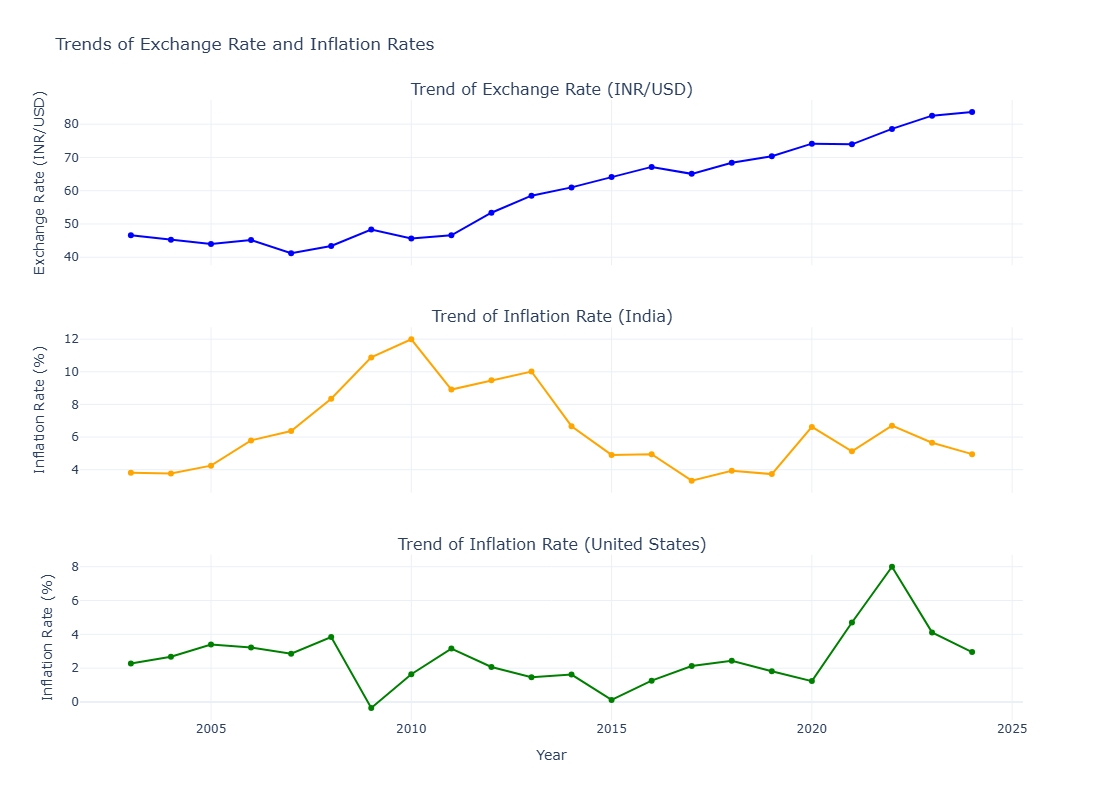

In [11]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=("Trend of Exchange Rate (INR/USD)",
                                    "Trend of Inflation Rate (India)",
                                    "Trend of Inflation Rate (United States)"))

fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Exchange Rate (INR/USD)'],
                         mode='lines+markers',
                         marker=dict(color='blue'),
                         name='Exchange Rate (INR/USD)'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Inflation Rate (India)'],
                         mode='lines+markers',
                         marker=dict(color='orange'),
                         name='Inflation Rate (India)'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Inflation Rate (United States)'],
                         mode='lines+markers',
                         marker=dict(color='green'),
                         name='Inflation Rate (United States)'),
              row=3, col=1)

fig.update_layout(height=800,
                  width=900,
                  showlegend=False,
                  title_text="Trends of Exchange Rate and Inflation Rates",
                  xaxis3_title="Year",
                  template='plotly_white')

fig.update_yaxes(title_text="Exchange Rate (INR/USD)", row=1, col=1)
fig.update_yaxes(title_text="Inflation Rate (%)", row=2, col=1)
fig.update_yaxes(title_text="Inflation Rate (%)", row=3, col=1)

fig.show()

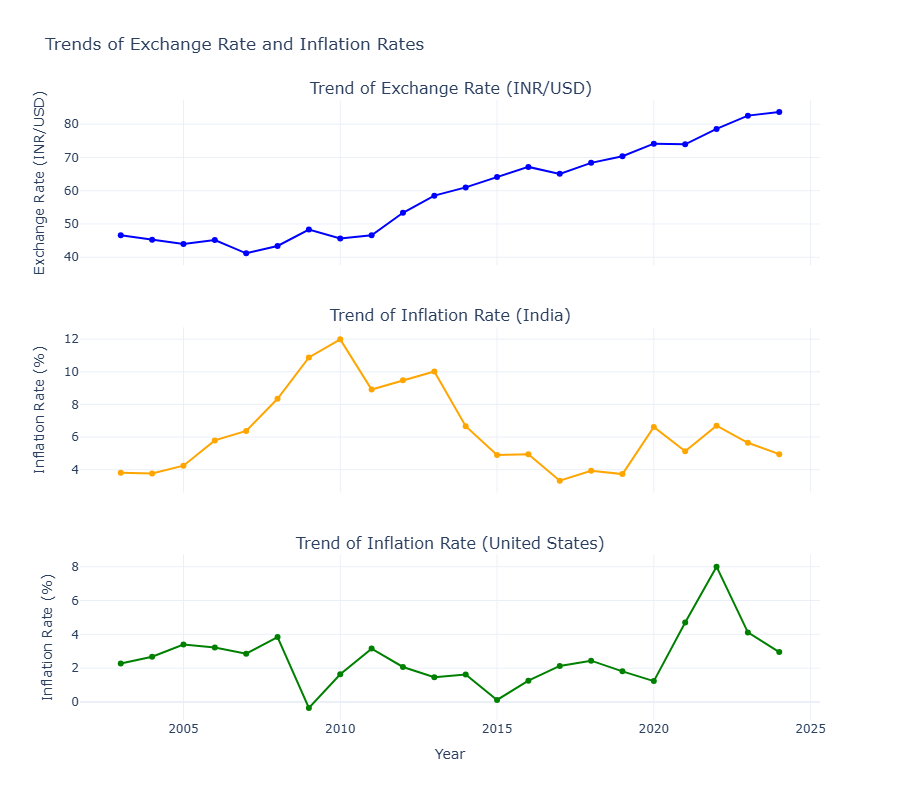

In [5]:
from IPython.display import Image, display
display(Image(filename="Trends_Exchange_Inflation.png"))

The exchange rate shows a general upward trend over the years, which indicates a depreciation of the Indian Rupee against the US Dollar. However, there are periods of both sharp increases and relative stability.


India’s inflation rate has fluctuated significantly over the years, with periods of high inflation (e.g., early 2000s) and more stable inflation in recent years. The United States has generally experienced lower and more stable inflation rates compared to India, with fewer extreme fluctuations.

Next, let’s perform a correlation analysis to explore the relationship between the inflation rates and the exchange rates

In [6]:
correlation_matrix = merged_df[['Exchange Rate (INR/USD)',
                                'Inflation Rate (India)',
                                'Inflation Rate (United States)']].corr()

correlation_matrix

,Exchange Rate (INR/USD),Inflation Rate (India),Inflation Rate (United States)
Exchange Rate (INR/USD),1.000000,-0.332018,0.240451
Inflation Rate (India),-0.332018,1.000000,-0.171965
Inflation Rate (United States),0.240451,-0.171965,1.000000


#### Findings from the correlation analysis:

###### Exchange Rate vs. Inflation Rate (India): The correlation coefficient is approximately -0.34, which indicates a weak negative relationship. It suggests that as inflation in India increases, the INR tends to depreciate against the USD, though the relationship is not very strong.

###### Exchange Rate vs. Inflation Rate (United States): The correlation coefficient is approximately 0.24, which indicates a weak positive relationship. It suggests that higher inflation in the United States might be associated with a depreciation of the USD against the INR, but again, the relationship is not strong.

###### Inflation Rate (India) vs. Inflation Rate (United States): The correlation between the inflation rates of India and the United States is very weak and negative (-0.12), which indicates that the inflation rates in these two countries do not move together.

Next, we’ll perform a comparative analysis to highlight periods of significant divergence or convergence between the inflation rates and the exchange rates:

In [7]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Exchange Rate (INR/USD)'],
                         mode='lines+markers',
                         name='Exchange Rate (INR/USD)',
                         line=dict(color='blue')))

fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Inflation Rate (India)'],
                         mode='lines+markers',
                         name='Inflation Rate (India)',
                         line=dict(color='orange')))

fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Inflation Rate (United States)'],
                         mode='lines+markers',
                         name='Inflation Rate (United States)',
                         line=dict(color='green')))

fig.update_layout(title='Comparative Analysis: Exchange Rate vs Inflation Rates (India & US)',
                  xaxis_title='Year',
                  yaxis_title='Value',
                  legend_title_text='Indicators',
                  template='plotly_white',
                  height=600,
                  width=1000)

fig.show()

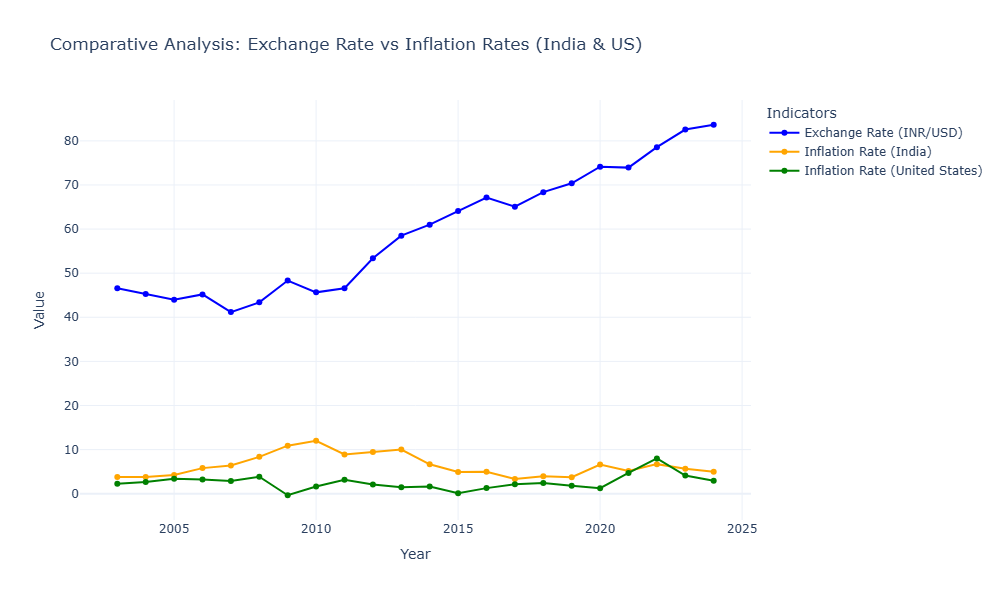

In [8]:
from IPython.display import Image, display
display(Image(filename="Comparative_Exchange_vs_Inflation.png"))

##### Findings from the comparative analysis:

###### Early 2000s: A period of high inflation in India coincides with a period of relative stability in the exchange rate. It suggests that factors other than inflation may have been driving the exchange rate during this time.
###### Late 2000s to Early 2010s: The period shows some alignment between rising inflation in India and a weakening INR, which indicates that inflation could be contributing to exchange rate movements.
###### 2015 Onwards: The exchange rate continues to rise, while both India’s and the United States’ inflation rates remain relatively low. This divergence suggests that the exchange rate is influenced by additional factors beyond inflation, such as economic growth, monetary policy, and international trade dynamics

### Analyzing Inflation based on the Purchasing Power Parity (PPP)

Purchasing Power Parity (PPP) is an economic theory that suggests that in the long term, exchange rates between two countries should adjust so that a basket of goods costs the same in both countries when priced in a common currency. PPP is used as a method to compare the economic productivity and standards of living between different countries. If one country’s inflation rate is higher than another’s, its currency should depreciate accordingly to maintain parity in purchasing power to ensure that the same goods cost the same in both locations.

In [9]:
initial_exchange_rate = merged_df['Exchange Rate (INR/USD)'].iloc[0]

# calculate expected exchange rate based on PPP
merged_df['Expected Exchange Rate (PPP)'] = initial_exchange_rate * (
    (1 + merged_df['Inflation Rate (India)'] / 100) / (1 + merged_df['Inflation Rate (United States)'] / 100)
).cumprod()

fig = go.Figure()

# plot actual exchange rate
fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Exchange Rate (INR/USD)'],
                         mode='lines+markers',
                         name='Actual Exchange Rate (INR/USD)',
                         line=dict(color='blue')))

# plot PPP-based expected exchange rate
fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Expected Exchange Rate (PPP)'],
                         mode='lines+markers',
                         name='Expected Exchange Rate (PPP)',
                         line=dict(color='orange', dash='dash')))

fig.update_layout(title='Actual vs. Expected Exchange Rate (PPP)',
                  xaxis_title='Year',
                  yaxis_title='Exchange Rate (INR/USD)',
                  legend_title_text='Exchange Rates',
                  template='plotly_white',
                  height=600,
                  width=1000)

fig.show()

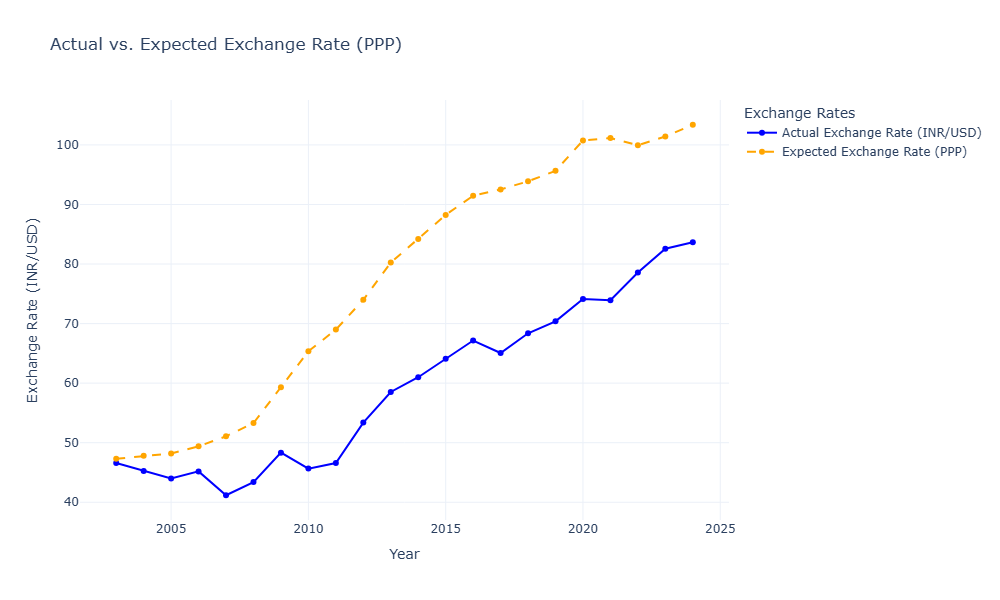

In [10]:
from IPython.display import Image, display
display(Image(filename="Actual_vs_Expected_PPP.png"))

The blue line represents the actual exchange rate (INR/USD) over time, while the orange dashed line represents the expected exchange rate based on PPP. In some periods, the actual exchange rate closely follows the expected PPP-based rate, which suggests that PPP holds. However, in other periods, there are significant deviations between the two.

The PPP-based expected exchange rate shows a more rapid increase compared to the actual exchange rate. It suggests that, according to PPP, the INR should have depreciated more than it actually did. However, the actual exchange rate was consistently lower than the PPP-based expected rate, which indicates that factors other than inflation are at play.

### Conclusion

Our analysis revealed that inflation in India and the United States influences the exchange rate between INR and USD. Higher inflation in India generally leads to a depreciation of the INR relative to the USD, while lower inflation in the United States contributes to a stronger USD. While inflation affects the exchange rate between INR and USD, it is only one of many factors.